In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import string
import re
import nltk
import gensim
import spacy
import en_core_web_sm
import requests

# Preprocesado y modelado
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn import model_selection
from sklearn.cluster import MiniBatchKMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 

#nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk import pos_tag

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger') #<--- https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/ 
nltk.download('punkt')

from bs4 import BeautifulSoup

# evaluacion modelos
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
dfen = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master/dfenclean2 (2).csv')
dfen

ID                                              Title  \
0       27                                  Kenya Vision 2030   
1       37           Kenya National Social Protection Policy    
2       41        National Disaster risk Management Framework   
3       42       The National Disaster Management Plan (NDMP)   
4       43     National Disaster Risk Reduction Policy (2013)   
...    ...                                                ...   
2008  4111         Eighth National Develepment Plan 2022-2026   
2009  4112              National Livestock Development Policy   
2010  4113  National Strategy to Reduce Deforestration and...   
2011  4117  Intended Nationally Determined Contribution (I...   
2012  4120  Plano Integrado de Aceleiração da Agricultura ...   

                                            Description  \
0     Kenya Vision 2030 is the country’s long term d...   
1     The Kenya National Social Protection Policy (N...   
2     The National Disaster risk Management Framewor...   
3     The government adopted the National Disaster M...   
4     To tackle environmental issues, the government...   
...                                                 ...   
2008  The "Eighth National Development Plan (8NDP) -...   
2009  This Policy promotes sustainable livestock dev...   
2010  Zambia has developed the National REDD+ Strate...   
2011  The INDC of Mexico has two components, one for...   
2012  The Integrated Plan for the Improvement of Fam...   

                                                 addinf  \
0                                                         
1                                                         
2                                                         
3                                                         
4                                                         
...                                                 ...   
2008                                                      
2009  The livestock industry is increasingly becomin...   
2010                                                      
2011                                                      
2012                                                      

                                                    CPP  \
0                                                         
1                                                         
2     The Framework set nine priority areas to estab...   
3     The plan aimed at enhancing the capacity of th...   
4     To tackle environmental issues, the government...   
...                                                 ...   
2008                                                      
2009  In order to attain this vision, the Government...   
2010  To tackle the challenge of deforestation and f...   
2011  The INDC of Mexico has two components, one for...   
2012                                                      

                           Policy category 1  Policy category code 1  \
0          Long-term development plan/vision                    11.0   
1                Social protection (general)                    41.0   
2     Disaster risk reduction and management                    71.0   
3     Disaster risk reduction and management                    71.0   
4     Disaster risk reduction and management                    71.0   
...                                      ...                     ...   
2008        Mid-term implementation strategy                    12.0   
2009                               Livestock                    33.0   
2010                                Forestry                    52.0   
2011                          Climate change                    55.0   
2012               Fisheries and aquaculture                    34.0   

      Policy category code 2  Policy category code 3 Lang  \
0                        0.0                     0.0   en   
1                        0.0                     0.0   en   
2                        0.0                     0.0

In [3]:
dfen['Policycat'] = dfen['Policycat'].astype(int)
corpus=dfen['tokenclean']
labels=dfen['Policycat'].astype(str)

In [4]:
y=labels

In [5]:
#Calcular frequencias de cada label
dfen['Policy category 1'].value_counts()

Social protection (general)                    225
Agriculture and rural development (general)    171
Long-term development plan/vision              152
Natural resources (general)                    148
Climate change                                 142
Food security and nutrition (general)          141
Mid-term implementation strategy               139
Nutrition                                      103
Forestry                                        96
Disaster risk reduction and management          69
Biodiversity                                    67
Youth development                               61
Territorial development                         58
Fisheries and aquaculture                       57
Gender                                          52
Crop development and diversification            50
Livestock                                       45
Water resources management                      37
Poverty reduction                               35
Labour and employment          

In [6]:
#calcular % de cada label
dfen['Policy category 1'].value_counts(1)

Social protection (general)                    0.111773
Agriculture and rural development (general)    0.084948
Long-term development plan/vision              0.075509
Natural resources (general)                    0.073522
Climate change                                 0.070541
Food security and nutrition (general)          0.070045
Mid-term implementation strategy               0.069051
Nutrition                                      0.051167
Forestry                                       0.047690
Disaster risk reduction and management         0.034277
Biodiversity                                   0.033284
Youth development                              0.030303
Territorial development                        0.028813
Fisheries and aquaculture                      0.028316
Gender                                         0.025832
Crop development and diversification           0.024839
Livestock                                      0.022355
Water resources management                     0

Text(0, 0.5, 'Number of docs')

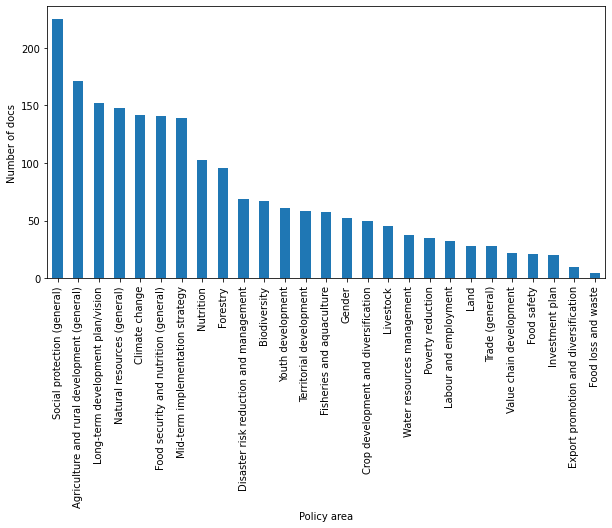

In [7]:
#Distribution of policy areas
ax = dfen['Policy category 1'].value_counts().plot(kind='bar', figsize=(10,5))
fig = ax.get_figure()
ax.set_xlabel('Policy area')
ax.set_ylabel('Number of docs')

In [8]:
#Metodo 1 - Bag of words
from sklearn.feature_extraction.text import CountVectorizer
bow_converter = CountVectorizer(lowercase=False)
x = bow_converter.fit_transform(dfen['tokenclean'])
words = bow_converter.get_feature_names_out()
len(words)

9578

In [9]:
#Para obtener methods
#object_methods = [method_name for method_name in dir(CountVectorizer)
                  #if callable(getattr(CountVectorizer, method_name))]
#object_methods

In [10]:
#Otra forma de obtener bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
data_corpus = corpus
X = vectorizer.fit_transform(data_corpus) 
print(X.toarray())
print(vectorizer.get_feature_names())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['aadmer', 'aaps', 'aasr', 'abandon', 'abandonment', 'abandono', 'abate', 'abatement', 'abbreviate', 'abc', 'abcs', 'abide', 'abilities', 'ability', 'abiotic', 'abject', 'able', 'abled', 'ably', 'abnormal', 'aboard', 'abordagem', 'abordagens', 'abranger', 'abrangida', 'abrangidas', 'abreast', 'abroad', 'abs', 'absence', 'absenteeism', 'absolute', 'absorb', 'absorption', 'abstraction', 'abtc', 'abtcs', 'abuja', 'abundance', 'abundant', 'abuse', 'abusive', 'ac', 'acade', 'academe', 'academia', 'academic', 'academically', 'academics', 'academies', 'academy', 'acb', 'acc', 'accede', 'accelerate', 'acceleration', 'accentuate', 'accept', 'acceptability', 'acceptable', 'acceptance', 'acces', 'access', 'accessib', 'accessibility', 'accessible', 'accession', 'accessories', 'accident', 'accidents', 'accommodate', 'accommodation', 'accompany', 'accomplish', 'accomplishment', 'ac

In [11]:
bigram_converter = CountVectorizer(ngram_range=[2,2], lowercase=False) 
x2 = bigram_converter.fit_transform(corpus)
bigrams = bigram_converter.get_feature_names()
len(bigrams)

119007

In [12]:
trigram_converter = CountVectorizer(ngram_range=[3,3], lowercase=False) 
x3 = trigram_converter.fit_transform(corpus)
trigrams = trigram_converter.get_feature_names()
len(trigrams)

168378

In [13]:
print(len(words), len(bigrams), len(trigrams))

9578 119007 168378


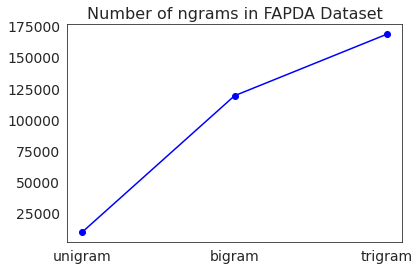

In [14]:
sns.set_style("white")
counts = [len(words), len(bigrams), len(trigrams)]
plt.plot(counts, color='blue')
plt.plot(counts, 'bo')
#plt.margins(0.1)
plt.ticklabel_format(style = 'plain')
plt.xticks(range(3), ['unigram', 'bigram', 'trigram'])
plt.tick_params(labelsize=14)
plt.title('Number of ngrams in FAPDA Dataset', {'fontsize':16})
plt.show()

In [70]:
training_data, test_data = model_selection.train_test_split(dfen, train_size = 0.8, random_state=0)

In [71]:
bow_transform = CountVectorizer(lowercase=False)
X_tr_bow = bow_transform.fit_transform(training_data['corpus3'])
len(bow_transform.vocabulary_)

8733

In [72]:
X_te_bow = bow_transform.transform(test_data['corpus3'])

In [74]:
y_tr = training_data['Policycat']
y_te = test_data['Policycat']

In [75]:
corpus

0       ['long', 'term', 'blueprint', 'transform', 'ne...
1       ['social', 'protection', 'social', 'protection...
2       ['disaster', 'risk', 'management', 'disaster',...
3       ['disaster', 'management', 'ndmp', 'disaster',...
4       ['disaster', 'risk', 'reduction', 'tackle', 'e...
                              ...                        
2008    ['eighth', 'develepment', 'eighth', 'ndp', 'so...
2009    ['livestock', 'livestock', 'expansion', 'exten...
2010    ['deforestration', 'forest', 'degredation', 'r...
2011    ['intend', 'nationally', 'determine', 'contrib...
2012    ['plano', 'integrado', 'de', 'aceleira', 'da',...
Name: tokenclean, Length: 2013, dtype: object

In [76]:
tfidf = TfidfTransformer()
X_tr_tfidf = tfidf.fit_transform(X_tr_bow)
X_te_tfidf = tfidf.fit_transform(X_te_bow)

In [84]:
def simple_logistic_classify1(X_tr, y_tr, X_test, y_test, description, _C=0.1, solver='newton-cg'):
    model = LogisticRegression(C=_C,random_state=0).fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'newton-cg features', score)
    return model

def simple_logistic_classify2(X_tr, y_tr, X_test, y_test, description, _C=1.0, solver='lbfgs'):
    model = LogisticRegression(C=_C,random_state=0).fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'lbfgs features', score)
    return model

def simple_logistic_classify3(X_tr, y_tr, X_test, y_test, description, _C=1.0, solver='liblinear'):
    model = LogisticRegression(C=_C,random_state=0).fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'liblinear features', score)
    return model

In [83]:
model_bow = simple_logistic_classify1(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')


Test Score with bow newton-cg features 0.6550868486352357


In [85]:
model_bow = simple_logistic_classify2(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')
model_bow = simple_logistic_classify3(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')

Test Score with bow lbfgs features 0.6476426799007444
Test Score with bow liblinear features 0.6476426799007444


In [88]:
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
params = dict(solver=solver_list, C=C,
                      logistic_Reg__penalty=penalty)
log_reg = LogisticRegression( n_jobs=-1, random_state=0)
clf = GridSearchCV(log_reg, params, cv=5)
clf.fit(X_tr_bow, y_tr)
scores = clf.cv_results_['mean_test_score']

for score, solver in zip(scores, solver_list):
    print(f"  {solver} {score:.3f}" )

ValueError: ignored

In [ ]:
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
log_reg = LogisticRegression( n_jobs=-1, random_state=0)
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
parameters = dict(    C=C, solver= solver_list,
                      penalty=penalty)
clf_GS = GridSearchCV(log_reg, parameters)
clf_GS.fit(X_tr_bow, y_tr)

In [ ]:
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

In [56]:
def simple_logistic_classify4(X_tr, y_tr, X_test, y_test, description, _C=1000, solver='liblinear'):
    model = LogisticRegression(C=_C).fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'newton-cg features', score)
    return model
model_tfidf = simple_logistic_classify4(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf')

Test Score with tf-idf newton-cg features 0.6746031746031746


In [26]:
def multi_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=0.01):
    model = LogisticRegression(C=_C,multi_class='multinomial').fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'features', score)
    return model

In [28]:
# evaluate multinomial logistic regression model

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
model = LogisticRegression(solver='lbfgs')
n_scores = cross_val_score(model, X, labels, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# evaluate logistic regression model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model2 = LogisticRegression()
n_scores = cross_val_score(model2, X, labels, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
model_bow = multi_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')

In [ ]:
model_tfidf = multi_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf')

In [ ]:
scores = ["precision", "recall"]

In [ ]:
mul_lr = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_tr_bow, y_tr)

In [ ]:
param_grid_ = {'C': [1e-3, 1e-1, 1e0, 1e1, 1e2], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
bow_search = model_selection.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_, scoring='accuracy',error_score=0)
tfidf_search = model_selection.GridSearchCV(LogisticRegression(), cv=5,
                                   param_grid=param_grid_)

In [ ]:
bow_search.fit(X_tr_bow, y_tr)

In [ ]:
estimator.get_params().keys()

In [ ]:
GridSearchCV(cv=5, error_score=None,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Create the tf-idf representation using the bag-of-words matrix
tfidf_transform = corpus.TfidfTransformer(norm=None)
X_tfidf = tfidf_transform.fit_transform(X_bow)

In [ ]:
#Dividir en train y test
train, test = train_test_split(dfen, test_size=0.3, random_state = 5)
X_train=train['corpus3']
X_test=test['corpus3']
y_train=train['Policycat']
y_test=test['Policycat']

In [ ]:
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(X)
vectors[0]

In [ ]:
# TfidfVectorizer 
# CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [ ]:
mul_lr = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)

In [ ]:
corpus=X
id2word = gensim.corpora.Dictionary(corpus)
vectors = [
    id2word.doc2bow(doc) for doc in corpus
]
vectors[1]

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [ ]:
countvectorizer = CountVectorizer(analyzer= 'word')
tfidfvectorizer = TfidfVectorizer(analyzer='word')
count_wm = countvectorizer.fit_transform(X_train)
tfidf_wm = tfidfvectorizer.fit_transform(X_train)

In [ ]:
from sklearn.preprocessing import Binarizer

freq   = CountVectorizer()
corpus = freq.fit_transform(vectors)

onehot = Binarizer()
corpus = onehot.fit_transform(X_train.toarray())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer()
corpus = tfidf.fit_transform(X)
dense = corpus.toarray()
dense

In [ ]:
from nltk.text import TextCollection

def vectorize(corpus):
    corpus = corpus
    texts  = TextCollection(corpus)

    for doc in corpus:
        yield {
            term: texts.tf_idf(term, doc)
            for term in doc }